# Making predictions

In [15]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

y = house['saleprice']
X = house

X['paveddrive'] = X['paveddrive'].apply(lambda x: [0, 1][(x=='Y')])
X['centralair'] = X['centralair'].apply(lambda x: [0, 1][(x=='Y')])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 465)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


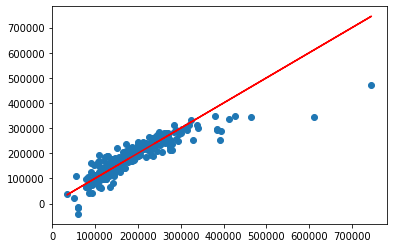

Mean Absolute Error: 		24169.309871684633
Mean Squared Error: 		1457655930.8254855
Root Mean Squared Error: 	38179.26048033782
Mean Absolute Percentage Error: 14.833104547463327


In [16]:
X_train_1 = X_train[['grlivarea', 'totalbsmtsf', 'fullbath', 'halfbath', 'overallqual', 'overallcond', 'yearbuilt', 'garagearea']]
X_train_1 = sm.add_constant(X_train_1)

results = sm.OLS(y_train, X_train_1).fit()

X_test_1 = X_test[['grlivarea', 'totalbsmtsf', 'fullbath', 'halfbath', 'overallqual', 'overallcond', 'yearbuilt', 'garagearea']]
X_test_1 = sm.add_constant(X_test_1)
y_pred_1 = results.predict(X_test_1)

plt.scatter(y_test, y_pred_1)
plt.plot(y_test, y_test, color="red")
plt.show()

print('Mean Absolute Error: \t\t{}'.format(mean_absolute_error(y_test, y_pred_1)))
print('Mean Squared Error: \t\t{}'.format(mse(y_test, y_pred_1)))
print('Root Mean Squared Error: \t{}'.format(rmse(y_test, y_pred_1)))
print('Mean Absolute Percentage Error: {}'.format(np.mean(np.abs((y_test-y_pred_1)/y_test)*100)))

The average error is about 15% of a house's sale price.

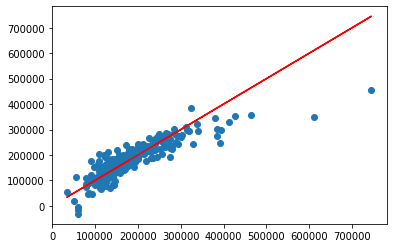

Mean Absolute Error: 		26360.598772917176
Mean Squared Error: 		1615366415.5605264
Root Mean Squared Error: 	40191.62121090074
Mean Absolute Percentage Error: 16.294751198626344


In [17]:
X_train_2 = X_train[['grlivarea', 'totalbsmtsf', 'fullbath', 'halfbath', 'overallqual', 'overallcond', 'yearbuilt', 'garagearea']]

results = sm.OLS(y_train, X_train_2).fit()

X_test_2 = X_test[['grlivarea', 'totalbsmtsf', 'fullbath', 'halfbath', 'overallqual', 'overallcond', 'yearbuilt', 'garagearea']]
y_pred_2 = results.predict(X_test_2)

plt.scatter(y_test, y_pred_2)
plt.plot(y_test, y_test, color="red")
plt.show()

print('Mean Absolute Error: \t\t{}'.format(mean_absolute_error(y_test, y_pred_2)))
print('Mean Squared Error: \t\t{}'.format(mse(y_test, y_pred_2)))
print('Root Mean Squared Error: \t{}'.format(rmse(y_test, y_pred_2)))
print('Mean Absolute Percentage Error: {}'.format(np.mean(np.abs((y_test-y_pred_2)/y_test)*100)))

I wanted to expand on the anomaly from our last assignment, where goodness of fit increased when we removed the constant term. That model is attempted here, and our predictions become less accurate. This is more in line with what we would expect.

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


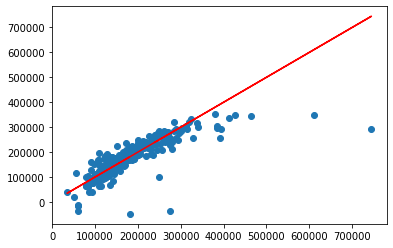

Mean Absolute Error: 		26758.997064383122
Mean Squared Error: 		2446716188.305869
Root Mean Squared Error: 	49464.292053014055
Mean Absolute Percentage Error: 15.925169046632936


In [18]:
X_train_3 = X_train[['grlivarea', 'totalbsmtsf', 'fullbath', 'halfbath', 'overallqual', 'overallcond', 'yearbuilt', 'garagearea', 'poolarea', 'paveddrive', 'centralair']]
X_train_3 = sm.add_constant(X_train_3)

results = sm.OLS(y_train, X_train_3).fit()

X_test_3 = X_test[['grlivarea', 'totalbsmtsf', 'fullbath', 'halfbath', 'overallqual', 'overallcond', 'yearbuilt', 'garagearea', 'poolarea', 'paveddrive', 'centralair']]
X_test_3 = sm.add_constant(X_test_3)
y_pred_3 = results.predict(X_test_3)

plt.scatter(y_test, y_pred_3)
plt.plot(y_test, y_test, color="red")
plt.show()

print('Mean Absolute Error: \t\t{}'.format(mean_absolute_error(y_test, y_pred_3)))
print('Mean Squared Error: \t\t{}'.format(mse(y_test, y_pred_3)))
print('Root Mean Squared Error: \t{}'.format(rmse(y_test, y_pred_3)))
print('Mean Absolute Percentage Error: {}'.format(np.mean(np.abs((y_test-y_pred_3)/y_test)*100)))

After adding in poolarea, paveddrive, and centralair, our model's performance is worse than our original model. Interestingly, it is still slightly better than our "constant removed" model if measured by MAPE, but worse if measued by MAE, MSE, and RMSE.